In [26]:
# Import All Libraries
import numpy as np
%matplotlib inline  

import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score,\
precision_score, recall_score
from sklearn import tree, svm, ensemble
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from IPython.display import Image
import pydotplus 

In [27]:
#Read the data
data = pd.read_csv('data.csv')
print data.info() # to check all columns have the same number of entries. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
diagnosis_binary           569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-n

In [28]:
#train the model with all the data.
model = smf.glm(formula = 'diagnosis_binary~radius_se+texture_worst+area_worst+concavepoints_worst', data = data, family = sm.families.Binomial()).fit()
print model.summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:       diagnosis_binary   No. Observations:                  569
Model:                            GLM   Df Residuals:                      564
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 24 Jun 2017   Deviance:                       82.291
Time:                        15:59:47   Pearson chi2:                     255.
No. Iterations:                    12                                         
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept             -28.8899      4.314     -6.697      0.000       -37.346   -20.434
radius_se               8

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print '\nMetrics'
print 'Accuracy: %.3f' %accuracy_score(data['diagnosis_binary'], model.predict()>0.5)
print 'Precision: %.3f' %precision_score(data['diagnosis_binary'], model.predict()>0.5)
print 'Recall: %.3f' %recall_score(data['diagnosis_binary'], model.predict()>0.5)


Metrics
Accuracy: 0.967
Precision: 0.957
Recall: 0.953


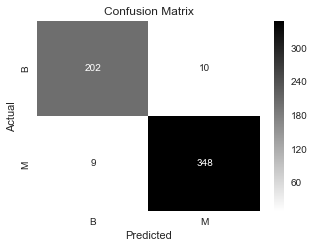

In [30]:
#Create Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(data['diagnosis_binary'], model.predict()>0.5, labels = [1, 0])
df_cm = pd.DataFrame(conf_mat, index = ['B', 'M'], columns = ['B', 'M'])
plt.figure(figsize = (5,3.5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap = 'binary')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [31]:
#Split data in test and train. 80% train, 20% test.
train, test = train_test_split(data, test_size = 0.2, random_state = 42)
variables = ['radius_se','texture_worst','area_worst','concavepoints_worst']
X_train = train[variables]
y_train = train['diagnosis_binary']
X_test = test[variables]
y_test = test['diagnosis_binary']

In [32]:
#This section creates a tree and then looks for the values of max_depth and min_impurity_slpit to create the best tree possible.

cancertree = tree.DecisionTreeClassifier()

# For more information on what is happening here see slide 25

parameters_tree = {'min_impurity_split': np.linspace(0,0.2,20),'max_depth':range(2,8)}

super_tree = GridSearchCV(cancertree, parameters_tree, cv=10, scoring='accuracy')
super_tree.fit(X_train,y_train)


# Returns the best fitted model on the data
bestcancertree = super_tree.best_estimator_  # cal super_tree.best_params_[min_impurity_split (or) max_depth] to get the optimal parameters

print '\nFor the training set:'
print 'Accuracy: %0.4f'%(accuracy_score(y_train, bestcancertree.predict(X_train)))
print 'Precision: %0.4f'%(precision_score(y_train, bestcancertree.predict(X_train)))
print 'Recall: %0.4f'%(recall_score(y_train, bestcancertree.predict(X_train)))


print '\nFor the test set:'
print 'Accuracy: %0.4f'%(accuracy_score(y_test, bestcancertree.predict(X_test)))
print 'Precision: %0.4f'%(precision_score(y_test, bestcancertree.predict(X_test)))
print 'Recall: %0.4f'%(recall_score(y_test, bestcancertree.predict(X_test)))

#Prints the values of max_depth and min_impurity_split that create the best tree. 
x = super_tree.best_params_['max_depth']
y =super_tree.best_params_['min_impurity_split']
print '\nMax_Depth: %.02f'%x
print 'Min_Impurity_Split: %.02f'%y


For the training set:
Accuracy: 0.9604
Precision: 0.9521
Recall: 0.9408

For the test set:
Accuracy: 0.9474
Precision: 0.9302
Recall: 0.9302

Max_Depth: 2.00
Min_Impurity_Split: 0.09


In [33]:
#Create 10 iterations of test and train data to find the mean value between them of Accuracy, Precision & Recall. 
from sklearn import tree 
scores = cross_val_score(bestcancertree, X_train, y_train, cv=10, scoring='accuracy') 
print 'Mean ACCURACY from the cross-validation: %.3f \nand the full vector: %s\n' %(np.mean(scores), ', '.join(map("{:.3f}".format, scores)))
scores2 = cross_val_score(bestcancertree, X_train, y_train, cv=10, scoring='precision') 
print 'Mean PRECISION from the cross-validation: %.3f \nand the full vector: %s\n' %(np.mean(scores2), ', '.join(map("{:.3f}".format, scores2)))
scores3 = cross_val_score(bestcancertree, X_train, y_train, cv=10, scoring='recall') 
print 'Mean RECALL from the cross-validation: %.3f \nand the full vector: %s\n' %(np.mean(scores3), ', '.join(map("{:.3f}".format, scores3)))
cancertree.fit(X_train,y_train)

Mean ACCURACY from the cross-validation: 0.941 
and the full vector: 0.957, 0.935, 0.978, 0.826, 0.978, 0.978, 0.956, 0.933, 0.978, 0.886

Mean PRECISION from the cross-validation: 0.930 
and the full vector: 0.895, 0.938, 1.000, 0.765, 0.944, 0.944, 1.000, 0.889, 1.000, 0.923

Mean RECALL from the cross-validation: 0.910 
and the full vector: 1.000, 0.882, 0.941, 0.765, 1.000, 1.000, 0.882, 0.941, 0.941, 0.750



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [34]:
#Plots the tree
dot_data = tree.export_graphviz(cancertree, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 


dot_data = tree.export_graphviz(cancertree, out_file=None,
                                feature_names = variables,
                                class_names = ('Negative', 'Positive'),
                                filled = True, rounded = True,
                                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found